# 시계열 데이터 분석 기초

#### 정성적 기법

주관적인 방법, 객관적인 데이터가 확보되지 않은 상태에서 수요를 예측할 때 사용

#### 정량적 기법

데이터가 확보된 상태에서 사용

## 시계열분석 (Time Series)

이전에 일어난 사건이 다음 일어날 사건에 어떤 영향을 줄까를 찾아가는 분석이다.

* 시간: 특정 간격을 갖는 시간 (= Lag)
    - Lag에서 Data의 Trend를 찾는다.


* 일변량 정상시계열
    - ARIMA


* Trend: 추세
* Seasonality: 계절성
* Cycle: 주기
* Noise: 잡음(시간에 따라 변동있는 것을 뜻함) 
    - White Noise(변동이 시간에 따라 독립되어있고, 통계적으로 분석이 가능한 경우)
    - 통계적 관점에서 'Noise'는 시간에 따라 독립적으로 평균 or 분산이 변하지 않는 데이터를 '분석가능한 잡음'이라고 한다.

시계열분석의 전제 조건은 시간에 따라서 데이터가 통계적, 기술적으로 분석이 가능한 정도의 Noise(= White Noise)를 바탕으로 분석하는 것이다.

하지만 실무에서는 변동이 없는 데이터는 없으므로 시계열분석을 powerful 하지 않다.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='Malgun Gothic')

In [3]:
df1 = pd.read_csv('data11.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [4]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [5]:
df1.tail()

,구매일,구매금액,물품대분류
803670,2020-08-06,30960,더블하트
803671,2020-08-06,6640,더블하트
803672,2020-08-06,5600,더블하트
803673,2020-08-06,7840,더블하트
803674,2020-08-06,8500,기타


In [4]:
df1['Datetime'] = pd.to_datetime(df1['구매일'])

In [6]:
df1['Datetime'].describe()

<ipython-input-6-1eedf18d289e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['Datetime'].describe()


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [8]:
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Week'] = df1['Datetime'].dt.isocalendar().week
df1['Day_of_week'] = df1['Datetime'].dt.day_name()

In [9]:
df1.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,Friday
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,Friday
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,Friday
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,Sunday


<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

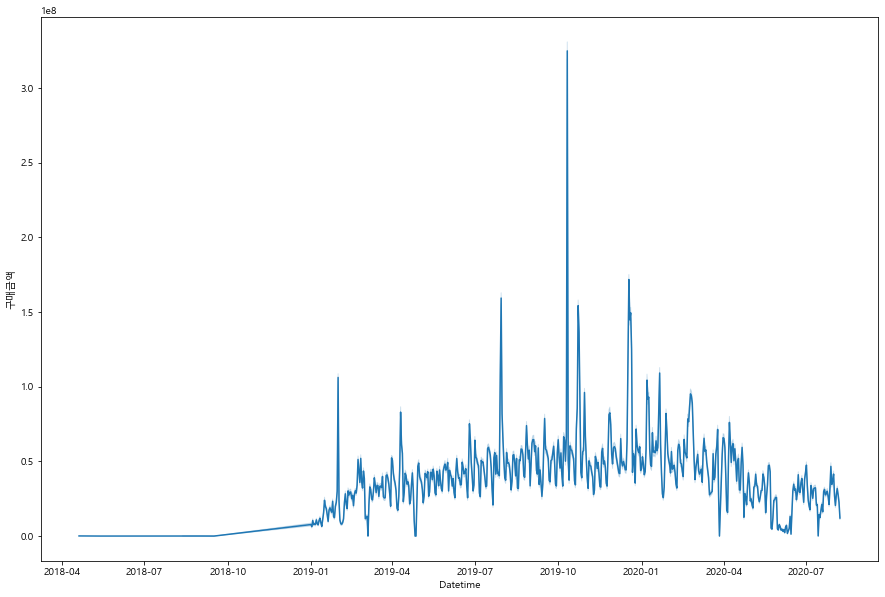

In [59]:
sns.lineplot(data=df1, x='Datetime', y='구매금액', estimator=sum)

데이터가 많기에 시간이 오래걸린다. 그래서 피벗 테이블을 이용해서 얻은 데이터로 그래프를 그리는 것이 시각 절약에 좋다.

In [11]:
p1 = pd.pivot_table(data=df1, index='Datetime', values='구매금액', aggfunc='sum').reset_index()

In [12]:
p1

,Datetime,구매금액
0,2018-04-20,100920
1,2018-05-06,26500
2,2018-05-14,20600
3,2018-08-12,75700
4,2018-09-01,48300
...,...,...
584,2020-08-03,27560340
585,2020-08-04,31832500
586,2020-08-05,27683180
587,2020-08-06,22574070


<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

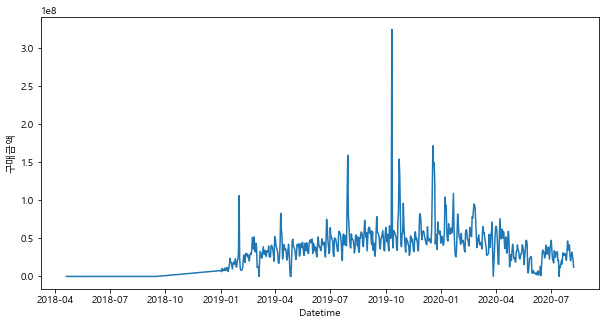

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=p1, x='Datetime', y='구매금액', estimator=sum)

In [14]:
p2 = pd.pivot_table(data=df1, index=['Datetime','물품대분류'], values='구매금액', aggfunc='sum').reset_index()

<AxesSubplot:xlabel='Datetime', ylabel='구매금액'>

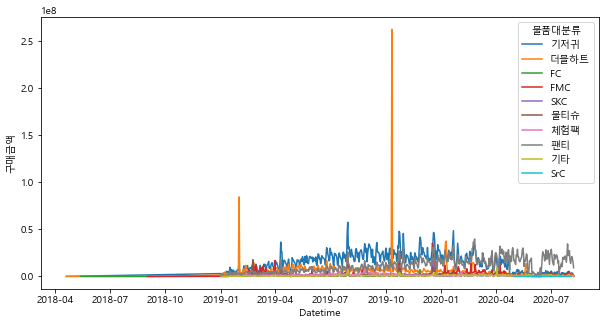

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(data=p2, x='Datetime', y='구매금액', hue='물품대분류')

'더블하트' 데이터는 시계열분석을 할 때 제거하거나 따로 분석하는 것이 좋다.

시계열분석을 하기 전에는 시각화를 해서 분석할 요건을 확인한다.

In [16]:
# '기저귀' 데이터만 추출
cond1 = (df1['물품대분류']=='기저귀')
df1.loc[cond1]

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,Friday
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
...,...,...,...,...,...,...,...,...
803578,2020-06-25,43400,기저귀,2020-06-25,2020,6,26,Thursday
803602,2020-06-26,43400,기저귀,2020-06-26,2020,6,26,Friday
803610,2020-06-28,49900,기저귀,2020-06-28,2020,6,26,Sunday
803631,2020-07-09,49900,기저귀,2020-07-09,2020,7,28,Thursday


기저귀 데이터는 2018-04-20과 2019-05-13일 사이에 데이터가 없다.

그래서 2018-04-20 행을 제거한다.

In [17]:
df2 = df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


**ARIMA (Auto Regressive Integrated  Moving Average Model)**

* ARIMA 사용 시기 및 조건
    - 단기예측에 적합
    - 계절적 변동요인 (주기적 변동요인)
    - 표본의 크기가 최소 50개 이상 
    - 정상적(Stationary)자료에 적용 가능 
        - 평균이 증가/감소 -> 차분(Difference)을 실시
        - 분산이 증가/감소 -> Lag 변환

[3가지 요소]

* AR (Auto Regressive Model) : 자기회귀모델(자기 데이터를 바탕으로 미래의 일을 예측한다.)
    - p 시점 전의 자료가 현재 시점의 데이터에 영향을 주는 자기회귀모델
    - 정성적인 자료(시간에 따라 평균이나 분산의 변화가 없고 일정한 형태를 취하는 데이터)에 대해서만 적용 가능
    - 실무에서는 외부 변동으로 정상적인 자료가 많이 없기에 MA, Difference를 추가한다.
    - ACF(Auto Correlation Function): 자기상관함수 / 특정 구간내 데이터간 상관관계
        * 문제점: 단일 시점 데이터가 현재 시점 데이터에 영향
        * ex) 교회 - 범죄율 => 독립된 두 변수가 상관관계가 있는 것처럼 보임 하지만 인구수가 증가해서 교회수가 증가하고 범죄율이 올라간 것이다.
    - PACF(Partial Auto Correlation Function): 부분자기상관함수(이전의 연속적인 연관성을 배제하고 이전과 지금 데이터의 관계를 파악하는 것)
        * ex) '인구' 지표를 배제하고 두 변수간 관계를 파악해서 교회와 범죄율은 서로 상관이 없다는 것을 알 수 있다.
    
    
    
* MA (Moving Average Model) : 이동평균모델
    - 일정한 구간 데이터의 평균을 계산해, 미래를 예측하는 모델 
    - 불규칙적인 변동 제거 가능


* Difference 차분 
    - 평균이 증가하거나 감소하는 데이터에 대해서 정상적(Stationary)인 데이터로 변환

In [1]:
import statsmodels.tsa.api as tsa # ARIMA 모델을 사용하는 라이브러리

In [18]:
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Week,Day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,Monday


In [20]:
df_time = pd.pivot_table(data=df2, index='Datetime', values='구매금액', aggfunc='sum')
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


인덱스에 시간 데이터가 있는 형식이 좋다.

In [26]:
# 1일 단위로 평균 금액 계산
y = df_time['구매금액'].resample('1D').mean()

In [27]:
# 결측값 확인
y.isnull().sum()

7

In [29]:
# 결측값 대체(결측값을 이전 데이터 혹은 다음 데이터로 대체하는 것이 좋다.)
## y.fillna( method='bfill') --> 이전 데이터
## y.fillna( method='ffill') --> 다음 데이터

y1 = y.fillna(method = 'ffill')

* 시계열 분해(tsa.seasonal_decompose)
    - Trend(경향성) 확인
    - Seasonality(계절성) 확인
    - Resdiual(불규칙 또는 순환 요인) 확인

In [42]:
# 그래프 크기 조정
from pylab import rcParams

rcParams['figure.figsize']=15, 10

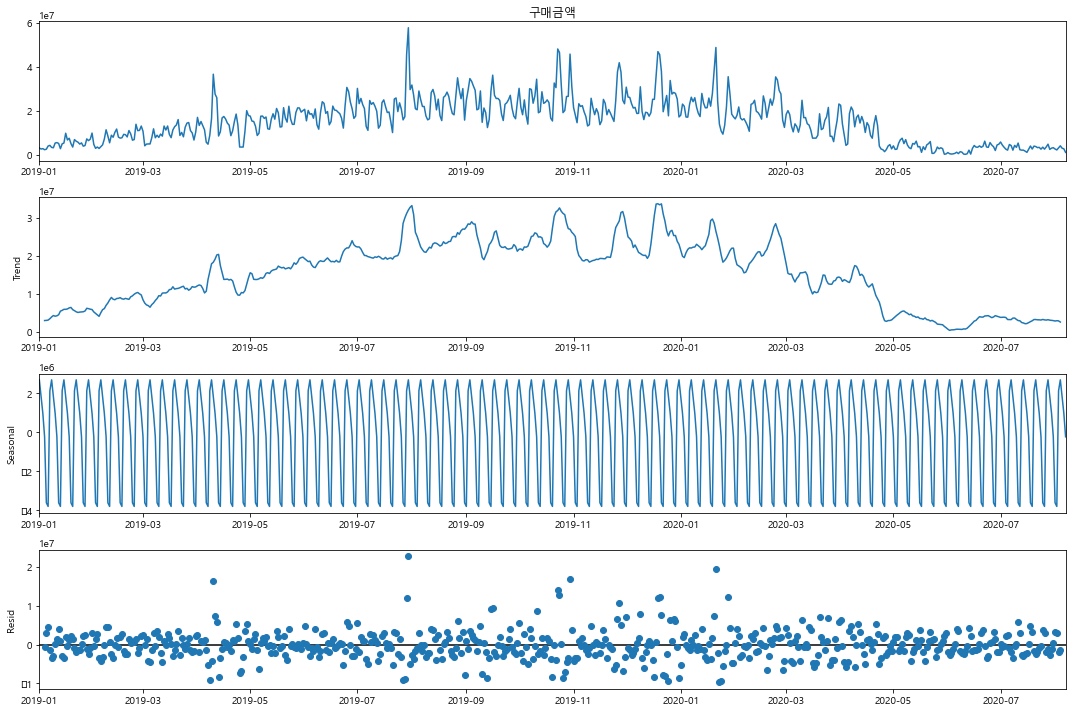

In [43]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1, model='additive')

# 모델 시각화
fig = model_series.plot()
plt.show()

In [44]:
import itertools # 반복수를 만드는 라이브러리 

In [61]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [62]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [68]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


각각은 ARIMA 모델의 parameter이다.

앞의 3개는 ARIMA 모델에 해당한다.

In [69]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [70]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y2,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [71]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')

- **Likelihood (최대우도): 특정 데이터가 모수(모집단)로부터 추출되었을 가능도**
    - 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수 pdf의 y값)
    
    
- **AIC (Akaike Information Criterion): 데이터에 대한 모델의 상대적 품질** 
    - AIC = -2 ln(L) + 2k
    - 값이 낮을 수록 모형 적합도가 높은 것을 의미한다.
    
    
- **BIC(Bayes Information Criterion)**
    - BIC = -2 ln(L) + log(n)p
    - 변수가 더 많은 경우, AIC에 더 많은 패널티를 부여해 계산
    
    
- **HQIC (Hannan Quinn Information Criterion)**
    - HQIC = -2 ln(L) + 2k ln(ln(n))
    - AIC와 BIC의 대안으로 사용 됨

In [72]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC


AIC 값이 낮을수록 변동이 없고 정확하다.

In [76]:
mod = tsa.statespace.SARIMAX(y1,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0721      0.063     -1.137      0.256      -0.196       0.052
ma.S.L12      -0.9948      0.022    -45.508      0.000      -1.038      -0.952
sigma2      6.593e+13        nan        nan        nan         nan         nan


- Order (p,d,q), Seasonal Order (P, D, Q, M)
    - p: AR에서의 p값 (p 구간 내 데이터 사이의 상관관계)
    - d: 차분
    - q: q MA PACF 평상관계수 p값
    - P: 계절성 주기의 패턴
    - D: 계절성 여부 판단(0 or 1)
    - Q: 계절성의 반복 횟수
    - M: 계절성 주기값


- Ljung - Box Test: 일정 기간동안 관측치가 랜덤이고, 독립적인지 여부를 검정
    - 귀무가설: 데이터가 상관관계를 나타내지 않는다.
    - 대립가설: 데이터가 상관관계를 나타낸다.
    - P-value(귀무가설이 참일 확률) < 0.05(유의수준) -> 대립가설 참


- Jarque Bera Test: 왜도(Skew)와 첨도(Kurtosis)가 정규분포와 일치하는지 가설 검정
    - SARIMAAX: 잔차의 분포가 정규분포인가
    - 귀무가설: 해당 잔차(residual)는 정규분포와 일치한다.
    - 대립가설: 해당 잔차(residual)는 정규분포와 일치하지 않는다.
    - P-value < 0.05, 해당 잔차는 정규분포와 일치하지 않는다.
    
Ljung - Box Test와 Jarque Bera Test는 실무에서 잘 확인하지 않는다.